## 1. Data preprocessing
### 1.1 Load the raw dataset

In [31]:
import pandas as pd

raw_data_path = r"Downloads/dataset 2.xlsx" # put the directory of the raw dataset between the quotation marks

raw_data = pd.read_excel(raw_data_path)
raw_data # This raw dataset contains the Geo-ID, all 6 dependent, and 26 independent variables

# Select the dependent variables "UHI_CN_Day" representing the avagera UHI per day throughout the entire year and the all the independent variables
select_data = raw_data

# Drop the missing values of UHI levels
#select_data = select_data.dropna(subset = ['UHI_CN_DAY']).reset_index(drop=True) 
select_data = select_data.dropna().reset_index(drop=True) # drop sample with missing values


data_1 = select_data

data_2 = select_data

data_2

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,879,6336,811,1118936313500,-24.046,513.096,6452106.035,1873271.842,15.0,7.0,...,201,0,3,4,1,869,881,22.92,9999.99,lankershim
1,1503,8609,1130,1118937560800,-6.564,996.874,6452313.510,1873714.849,16.2,7.4,...,203,0,3,4,1,1502,1509,46.10,0.97,lankershim
2,633,3318,275,1118937031700,-51.513,399.214,6452031.973,1873195.646,12.5,7.0,...,205,2,0,1,2,0,0,0.00,0.00,lankershim
3,1528,8866,404,1118937586500,-24.053,452.041,6452083.184,1873225.318,19.0,8.0,...,201,2,0,4,1,0,1541,0.00,0.00,lankershim
4,1350,10267,925,1118936706600,-14.416,520.815,6452118.062,1873274.613,18.0,7.0,...,203,0,3,4,1,1338,1353,28.07,9999.99,lankershim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,111,436,505,1118935723500,-9.224,1413.882,6452430.686,1874091.345,24.5,7.5,...,203,0,4,4,1,108,114,86.23,1.95,lankershim
10070,1023,6066,1197,1118937306500,-14.837,633.212,6452169.473,1873382.214,12.6,6.3,...,203,0,3,4,1,1017,1029,22.94,9999.99,lankershim
10071,1395,10321,527,1118936712000,40.585,1443.154,6452477.470,1874123.520,16.5,7.0,...,208,0,4,2,1,1378,1364,24.49,4.36,lankershim
10072,896,4788,846,1118937178700,-38.693,1348.224,6452406.835,1874037.639,12.8,6.5,...,201,0,4,4,1,894,898,55.59,1.47,lankershim


data.describe()

### 1.2 Knowledge-based feature selection 

In [32]:
Sel_feas = ['Global_X',
            'Global_Y',
            'Lane_ID',
            'v_length',
            'v_Width',
            'v_Class',
            'v_Acc',
            'Movement',
            'Space_Headway',
            'Time_Headway']

# Sel_data = data[Sel_feas]
# print("The number of original data records is ", str(len(Sel_data)))

# # drop the missing values
# Sel_data_na = Sel_data.dropna()

# missing_no = len(Sel_data)-len(Sel_data_na)

# print(str(missing_no) + ' data records are subject to missing values')
# print("Mising value rate is " + str(round(100 * missing_no/len(Sel_data), 4)) + '%')

# Sel_data_na

sel_data = data_2[Sel_feas]

sel_data

data = sel_data

In [33]:
data.describe()

,Global_X,Global_Y,Lane_ID,v_length,v_Width,v_Class,v_Acc,Movement,Space_Headway,Time_Headway
count,1.007400e+04,1.007400e+04,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000
mean,6.452186e+06,1.873428e+06,3.714810,15.440381,6.969297,2.023030,0.161417,1.102045,62.102820,1927.055197
std,1.684065e+02,4.215264e+02,4.779229,3.873878,0.455895,0.160863,5.575618,0.387830,114.757925,3922.825754
min,6.451896e+06,1.872801e+06,0.000000,6.200000,3.300000,1.000000,-15.840000,1.000000,0.000000,0.000000
25%,6.452054e+06,1.873084e+06,1.000000,13.500000,6.700000,2.000000,-0.310000,1.000000,0.000000,0.000000
50%,6.452140e+06,1.873310e+06,2.000000,15.000000,7.000000,2.000000,0.000000,1.000000,27.180000,2.610000
75%,6.452347e+06,1.873740e+06,3.000000,16.000000,7.200000,2.000000,0.370000,1.000000,63.337500,40.417500
max,6.452529e+06,1.874321e+06,101.000000,70.800000,8.500000,3.000000,15.840000,3.000000,1210.450000,9999.990000


### 1.3 Data imputation, outlier removal, and feature selection

#### 1.3.1 Uniform discretization-based data preprocessing

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split

def data_preproc_uniform(data, skew_method, outlier_removal, c, n, kernel, nb):
    '''
    Input:
    (1) data (pandas dataframe): the raw dataset for the selected features only
    (2) skew: data skew transform methods, including:
        (a) 'sigmoid': sigmoid function 
        (b) 'log': log10 function
        (c) 'cbt': cube root
        (d) 'ht': hyperbolic tangent function
        (e) 'bc': box-cox
        
    (3) outlier_removal (str): the type of outlier removal techniques, including:
        (a) 'MCD': minimum covariance determinant
        (b) 'LOF': local outlier factor
        (c) 'SVM': one-class SVM
        
    (4) c (float): the propotion of outliers in data 
    (5) n (int): the number of neighbors for LOF outlier detection technique
    (6) kernel (str): the type of kernel for one-class SVM
    (7) strategy: data discretization techniques, including:
        (a) 'uniform': equal-width discretization 

    (8) nb (int): the number of bins
        Note: if nb < 2, an error will be raised

    
    Output:
    (1) discret_data: clean discretized dataset for BN parameter learning
    '''
    
    '''
    Subtask 1: data scaling using min-max scaler
    '''
    # get the input values only for data normalization. Note: the output is categorical and no need to normalize it
    #inputs = data.drop(['UHI'], axis = 1) 
    inputs = data.copy()
    min_max_scaler = MinMaxScaler()
    data_temp = min_max_scaler.fit_transform(inputs)
    nor_data = pd.DataFrame(data_temp, columns = inputs.columns)
    
    # integrate the normalized inputs and categorical output
    #nor_data['UHI'] = data['UHI']
    
    '''
    Subtask 2: Outlier removal
    '''
    ################# Define a function for outlier removal##############
    #ref: https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
    def remove_outliers(data, outlier_removal, c, n, kernel):
        '''
        Input:
        (1) imp_data (pandas dataframe): the normalized and imputed dataset
        (2) outlier_removal (str): outlier removal method
        (3) c (float): the propotion of outliers in data (i.e., argument 1 in this function)
        (4) n (int): the number of neighbors for LOF outlier detection technique
        (5) kernel (str): the type of kernel for one-class SVM
        
        Output:
        (1) ro_data (pandas dataframe): complete dataset without outliers
        '''
        
        if outlier_removal == 'MCD':
            if c > 0.5: # c has a bound of (0, 0.5] for MCD algorithm  
                c = 0.5
                mcd = EllipticEnvelope(contamination = c, random_state = 0)
                y_hat = mcd.fit_predict(data)
                mask = y_hat != -1
                ro_data = data.loc[mask, :]
            else:
                mcd = EllipticEnvelope(contamination = c, random_state = 0)
                y_hat = mcd.fit_predict(data)
                mask = y_hat != -1
                ro_data = data.loc[mask, :]
            
        elif outlier_removal == 'LOF': 
            if c > 0.5: # c has a bound of (0, 0.5] for MCD algorithm
                c = 0.5
                lof = LocalOutlierFactor(n_neighbors = n, contamination = c)
                y_hat = lof.fit_predict(data)
                mask = y_hat != -1
                ro_data = data.loc[mask, :]
                
            else:
                lof = LocalOutlierFactor(n_neighbors = n, contamination = c)
                y_hat = lof.fit_predict(data)
                mask = y_hat != -1
                ro_data = data.loc[mask, :]
            
        elif outlier_removal == 'SVM':
            svm = OneClassSVM(kernel = kernel, nu = c)
            y_hat = svm.fit_predict(data)
            mask = y_hat != -1
            ro_data = data.loc[mask, :]
            
        ro_data = ro_data.reset_index(drop=True) # !!! reset the index of dataframe
        
        return ro_data
    
    ro_data = remove_outliers(nor_data, outlier_removal, c, n, kernel)
    
    '''
    Subtask 3: skew data transform
    '''
    def skew_transform(method, data):
    
        # step 1: define functions for the 5 skew transform methods
        def sigmoid(x):
            y = 1/(1 + np.exp(-x))
            return y

        def log_function(x):
            y = np.log10(x)
            return y

        def cube_root(x):
            y = np.cbrt(x)
            return y

        def hyper_tan(x):
            y = np.tanh(x)
            return y

        # step 2: select one of the skew method
        if method == 'sigmoid':
            y = sigmoid(data)

        elif method == 'log':
            y = log_function(data+1)

        elif method == 'cbt':
            y = cube_root(data)

        elif method == 'ht':
            y = hyper_tan(data)
        
        y = np.array(y)
        y = y.tolist()
        return y#np.array(y)
    
    #-----------------------------#
    headers = list(ro_data.columns)
    #headers.remove('UHI')

    trans_data = pd.DataFrame(columns = headers)
    for header in headers:
        #if header != 'UHI':
        y = ro_data[header]
        y1 = skew_transform(skew_method, y)
        trans_data[header] = y1
    
    # Trans_data have the input data only
    #print(trans_data)

    '''
    Subtask 4: Data discretization
    '''
    ################# Define a function for data discretization##############
    def data_discret(data, nb):
        
        """
        Input: 
        (1) ro_data (pandas dataframe): the complete dataset after outlier removal for the complete dataset
            Note: if n < 2, an error will be raised

        Output:
        (1) discret_data (pandas dataframe): the discretized dataset for all features
        """
        #data = data.drop(['UHI'], axis = 1)
        
        discret_model = KBinsDiscretizer(n_bins= nb, encode='ordinal', strategy='uniform', random_state = 0) # encode='ordinal' returns the bin identifier encoded as an integer value

        discret_inputs = discret_model.fit_transform(data)

        discret_data = pd.DataFrame(discret_inputs, columns = data.columns)

        return discret_data, discret_model
    
    discret_data, discret_model = data_discret(trans_data, nb)

    return discret_data, min_max_scaler# convert all elements to interger in case other data types will result in error 

discret_data, min_max_scaler = data_preproc_uniform(data, 
                                                    'cbt',    #skew_method, 
                                                    'SVM',    #outlier_removal, 
                                                    0.3,      #c, 
                                                    1,        #n, 
                                                    'linear', #kernel, 
                                                    4)        #nb
discret_data                                              

In [35]:
def data_preproc_scale_1(data, skew_method, outlier_removal, c, n, kernel, nb):
    
    '''
    Subtask 0: Discretize the output (i.e., UHI) using scale 1
    '''
    def scale_1(values):
    
        new_values = values.copy()

        for i in range(len(values)):
            value = values[i]
            #print(value)

            if value <= 0:
                new_values[i] = 0
            
            else:
                new_values[i] = 1
                
            #elif 0 < value <= 0.5:
            #    new_values[i] = 1
                
            #elif 0.5 < value <= 2:
            #    new_values[i] = 2
                
            #elif 2 < value <= 3.5:
            #    new_values[i] = 3
                
            #elif 3.5 < value <= 6.5:
            #    new_values[i] = 4

        return new_values
    
    #mask = (data['v_Acc'] <= 50) # Drop the sample with UHI>6.5 due to too less samples causing extreme data imbalance issue
    
    #data_1 = (data.loc[mask]).reset_index(drop=True)
    
    #data_1['v_Acc'] = scale_1(data_1['v_Acc'])
    
    #data = data_1.copy()
    
    '''
    Subtask 1: data scaling using min-max scaler
    '''
    # get the input values only for data normalization. Note: the output is categorical and no need to normalize it
    inputs = data.drop(['v_Acc'], axis = 1) 
    min_max_scaler = MinMaxScaler()
    data_temp = min_max_scaler.fit_transform(inputs)
    nor_data = pd.DataFrame(data_temp, columns = inputs.columns)
    
    # integrate the normalized inputs and categorical output
    nor_data['v_Acc'] = data['v_Acc']
    
    '''
    Subtask 2: Outlier removal
    '''
    ################# Define a function for outlier removal##############
    #ref: https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
    def remove_outliers(data, outlier_removal, c, n, kernel):
        '''
        Input:
        (1) imp_data (pandas dataframe): the normalized and imputed dataset
        (2) outlier_removal (str): outlier removal method
        (3) c (float): the propotion of outliers in data (i.e., argument 1 in this function)
        (4) n (int): the number of neighbors for LOF outlier detection technique
        (5) kernel (str): the type of kernel for one-class SVM
        
        Output:
        (1) ro_data (pandas dataframe): complete dataset without outliers
        '''
        
        if outlier_removal == 'MCD':
            if c > 0.5: # c has a bound of (0, 0.5] for MCD algorithm  
                c = 0.5
                mcd = EllipticEnvelope(contamination = c, random_state = 0)
                y_hat = mcd.fit_predict(data)
                mask = y_hat != -1
                ro_data = data.loc[mask, :]
            else:
                mcd = EllipticEnvelope(contamination = c, random_state = 0)
                y_hat = mcd.fit_predict(data)
                mask = y_hat != -1
                ro_data = data.loc[mask, :]
            
        elif outlier_removal == 'LOF': 
            if c > 0.5: # c has a bound of (0, 0.5] for MCD algorithm
                c = 0.5
                lof = LocalOutlierFactor(n_neighbors = n, contamination = c)
                y_hat = lof.fit_predict(data)
                mask = y_hat != -1
                ro_data = data.loc[mask, :]
                
            else:
                lof = LocalOutlierFactor(n_neighbors = n, contamination = c)
                y_hat = lof.fit_predict(data)
                mask = y_hat != -1
                ro_data = data.loc[mask, :]
            
        elif outlier_removal == 'SVM':
            svm = OneClassSVM(kernel = kernel, nu = c)
            y_hat = svm.fit_predict(data)
            mask = y_hat != -1
            ro_data = data.loc[mask, :]
            
        ro_data = ro_data.reset_index(drop=True) # !!! reset the index of dataframe
        
        return ro_data
    
    ro_data = remove_outliers(nor_data, outlier_removal, c, n, kernel)
    
    '''
    Subtask 3: skew data transform
    '''
    def skew_transform(method, data):
    
        # step 1: define functions for the 5 skew transform methods
        def sigmoid(x):
            y = 1/(1 + np.exp(-x))
            return y

        def log_function(x):
            y = np.log10(x)
            return y

        def cube_root(x):
            y = np.cbrt(x)
            return y

        def hyper_tan(x):
            y = np.tanh(x)
            return y

        def box_cox(x):
            y, _ = boxcox(x)
            return y

        # step 2: select one of the skew method
        if method == 'sigmoid':
            y = sigmoid(data)

        elif method == 'log':
            y = log_function(data+1)

        elif method == 'cbt':
            y = cube_root(data)

        elif method == 'ht':
            y = hyper_tan(data)

        else:
            y = box_cox(data)

        return np.array(y)
    
    #-----------------------------#
    headers = list(ro_data.columns)
    headers.remove('v_Acc')

    trans_data_X = []
    for header in headers:
        if header != 'v_Acc':
            y = ro_data[header]
            y1 = skew_transform(skew_method, y)
            trans_data_X.append(y1)
    
    # Trans_data have the input data only
    trans_data = pd.DataFrame(np.transpose(trans_data_X), columns = headers) 
    #print(trans_data)

    '''
    Subtask 4: Data discretization
    '''
    ################# Define a function for data discretization##############
    def data_discret(data, nb):
        
        """
        Input: 
        (1) ro_data (pandas dataframe): the complete dataset after outlier removal for the complete dataset
            Note: if n < 2, an error will be raised

        Output:
        (1) discret_data (pandas dataframe): the discretized dataset for all features
        """
        
        discret_model = KBinsDiscretizer(n_bins= nb, encode='ordinal', strategy='uniform', random_state = 0) # encode='ordinal' returns the bin identifier encoded as an integer value

        discret_inputs = discret_model.fit_transform(data)

        discret_data = pd.DataFrame(discret_inputs, columns = data.columns)

        return discret_data, discret_model
    
    discret_data, discret_model = data_discret(trans_data, nb)

    discret_data['v_Acc'] = ro_data['v_Acc']
    
    return discret_data, min_max_scaler# convert all elements to interger in case other data types will result in error 

discret_data, min_max_scaler = data_preproc_scale_1(data, 
                                                    'cbt',    #skew_method, 
                                                    'SVM',    #outlier_removal, 
                                                    0.2,      #c, 
                                                    1,        #n, 
                                                    'linear', #kernel, 
                                                    4)        #nb
discret_data                                              

#### 1.3.3 Mapping scale 2 for data preprocessing

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split

def data_preproc_scale_2(data, skew_method, outlier_removal, c, n, kernel, nb):
    
    '''
    Subtask 0: Discretize the output (i.e., UHI) using scale 1
    '''
    def scale_2(values):
    
        new_values = values.copy()

        for i in range(len(values)):
            value = values[i]
            #print(value)

            if -1 < value <= 1:
                new_values[i] = 1
                
            elif 1 < value <= 3:
                new_values[i] = 2
                
            elif 3 < value <= 50:
                new_values[i] = 3
                
            else:
                new_values[i] = 0

        return new_values
    
#     mask = (-1 <= data['UHI'])  
#     data_1 = (data.loc[mask]).reset_index(drop=True)
#     #print(data_1['UHI'])
    
    data['v_Acc'] = scale_2(data['v_Acc'])
    print(data['v_Acc'])
    
    temp = data.copy()
    
    '''
    Subtask 1: data scaling using min-max scaler
    '''
    # get the input values only for data normalization. Note: the output is categorical and no need to normalize it
    inputs = temp.drop(['v_Acc'], axis = 1) 
    min_max_scaler = MinMaxScaler()
    data_temp = min_max_scaler.fit_transform(inputs)
    nor_data = pd.DataFrame(data_temp, columns = inputs.columns)
    
    # integrate the normalized inputs and categorical output
    nor_data['v_Acc'] = data['v_Acc']
    
    #print(nor_data)
    
    '''
    Subtask 2: Outlier removal
    '''
    ################# Define a function for outlier removal##############
    #ref: https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
    def remove_outliers(data, outlier_removal, c, n, kernel):
        '''
        Input:
        (1) imp_data (pandas dataframe): the normalized and imputed dataset
        (2) outlier_removal (str): outlier removal method
        (3) c (float): the propotion of outliers in data (i.e., argument 1 in this function)
        (4) n (int): the number of neighbors for LOF outlier detection technique
        (5) kernel (str): the type of kernel for one-class SVM
        
        Output:
        (1) ro_data (pandas dataframe): complete dataset without outliers
        '''
        
        if outlier_removal == 'MCD':
            if c > 0.5: # c has a bound of (0, 0.5] for MCD algorithm  
                c = 0.5
                mcd = EllipticEnvelope(contamination = c, random_state = 0)
                y_hat = mcd.fit_predict(data)
                mask = y_hat != -1
                ro_data = data.loc[mask, :]
            else:
                mcd = EllipticEnvelope(contamination = c, random_state = 0)
                y_hat = mcd.fit_predict(data)
                mask = y_hat != -1
                ro_data = data.loc[mask, :]
            
        elif outlier_removal == 'LOF': 
            if c > 0.5: # c has a bound of (0, 0.5] for MCD algorithm
                c = 0.5
                lof = LocalOutlierFactor(n_neighbors = n, contamination = c)
                y_hat = lof.fit_predict(data)
                mask = y_hat != -1
                ro_data = data.loc[mask, :]
                
            else:
                lof = LocalOutlierFactor(n_neighbors = n, contamination = c)
                y_hat = lof.fit_predict(data)
                mask = y_hat != -1
                ro_data = data.loc[mask, :]
            
        elif outlier_removal == 'SVM':
            svm = OneClassSVM(kernel = kernel, nu = c)
            y_hat = svm.fit_predict(data)
            mask = y_hat != -1
            ro_data = data.loc[mask, :]
            
        ro_data = ro_data.reset_index(drop=True) # !!! reset the index of dataframe
        
        return ro_data
    
    ro_data = remove_outliers(nor_data, outlier_removal, c, n, kernel)
    
#     print('Original input data')
#     print(ro_data)
#     print('')
    
    '''
    Subtask 3: skew data transform
    '''
    def skew_transform(method, data):
    
        # step 1: define functions for the 5 skew transform methods
        def sigmoid(x):
            y = 1/(1 + np.exp(-x))
            return y

        def log_function(x):
            y = np.log10(x)
            return y

        def cube_root(x):
            y = np.cbrt(x)
            return y

        def hyper_tan(x):
            y = np.tanh(x)
            return y

        def box_cox(x):
            y, _ = boxcox(x)
            return y

        # step 2: select one of the skew method
        if method == 'sigmoid':
            y = sigmoid(data)

        elif method == 'log':
            y = log_function(data+1)

        elif method == 'cbt':
            y = cube_root(data)

        elif method == 'ht':
            y = hyper_tan(data)

        else:
            y = box_cox(data)

        return np.array(y)
    
    #-----------------------------#
    headers = list(ro_data.columns)
    headers.remove('v_Acc')

    trans_data_X = []
    for header in headers:
        if header != 'v_Acc':
            y = ro_data[header]
            y1 = skew_transform(skew_method, y)
            trans_data_X.append(y1)
    
    # Trans_data have the input data only
    trans_data = pd.DataFrame(np.transpose(trans_data_X), columns = headers) 
    #print(trans_data)

    '''
    Subtask 4: Data discretization
    '''
    ################# Define a function for data discretization##############
    def data_discret(data, nb):
        
        """
        Input: 
        (1) ro_data (pandas dataframe): the complete dataset after outlier removal for the complete dataset
            Note: if n < 2, an error will be raised

        Output:
        (1) discret_data (pandas dataframe): the discretized dataset for all features
        """
        #data = data.drop(['UHI'], axis = 1)
        
        discret_model = KBinsDiscretizer(n_bins= nb, encode='ordinal', strategy='uniform', random_state = 0) # encode='ordinal' returns the bin identifier encoded as an integer value

        discret_inputs = discret_model.fit_transform(data)
 
        #print('')
        #print('Discretization rules for the input data')
        #print(discret_model.bin_edges_ )

        discret_data = pd.DataFrame(discret_inputs, columns = data.columns)

        return discret_data, discret_model
    
    #discret_data, discret_model = data_discret(trans_data, nb)
    discret_data, discret_model = data_discret(ro_data, nb)

    discret_data['v_Acc'] = ro_data['v_Acc']
    
    return discret_data, min_max_scaler# convert all elements to interger in case other data types will result in error 

discret_data, min_max_scaler = data_preproc_scale_2(data, 
                                                    'cbt',    #skew_method, 
                                                    'SVM',    #outlier_removal, 
                                                    0.2,      #c, 
                                                    1,        #n, 
                                                    'linear', #kernel, 
                                                    4)        #nb
discret_data                                              

## 2. BN classifier development and evaluation

### 2.1 Bayesian classifier
#### 2.1.1 Parameter learning

In [37]:
#!pip install bnlearn

In [58]:
import bnlearn as bn
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd


def param_learning(BN_structure, data_tr):
    
    '''
    Input:
    (1) BN_structure (list): a list the stores all the edges between nodes of a BN structure
    (2) data_tr: the training dataset used to learn the dependency relationships between variables
    
    Output:
    (1) DAG_update: DAG with conditional prabability table for each node in DAG
    '''
    
    DAG = bn.make_DAG(BN_structure, verbose=0) # DAG is stored in an adjacency matrix
                                        # 'verbose=0' print no progress to screen (default: verbose = 3)
    # visualize the DAG
    #bn.plot(DAG)
    
    DAG_update = bn.parameter_learning.fit(DAG, data_tr, verbose=0)
    
    # visualize the updated DAG with CPD
    #bn.plot(DAG_update, interactive=True)
    
    return DAG_update 


def bn_infer(X_te, bn_model, variables):
    
    '''
    Input:
    (1) X_te (pandas dataframe): data that include observations for all selected evidence for inference
    (2) bn_model: trained Bayesian network with known DAG and CPD
    (3) variables (list): the feature(s) to be infered using the trained Bayesian network
    
    Output:
    (1) y_pred (pandas dataframe): the predicted class for pile capacity
    '''
    
    '''
    step 1: extract the evidence from the discretized testing dataset
    '''
    X_te.reset_index(drop = True, inplace = True)
    
    evidence_names = list(X_te.columns)
    
    query_result = []
    
    for row in list(X_te.index):
        
        evidence = {}
        
        for evidence_name in evidence_names:
        
            evidence[evidence_name] = X_te.loc[row, evidence_name]
        
        query = bn.inference.fit(bn_model, variables = variables, evidence = evidence, verbose = 0)
        
        p_list = list(query.df['p']) # query.df is a pandas dataframe
        
        pred = list(query.df[variables[0]])
        
        max_idx = p_list.index(max(p_list))
        
        query_result.append(pred[max_idx])
        
    y_pred = pd.DataFrame(query_result, columns = variables)
      
    return y_pred

In [59]:
from sklearn import metrics
from sklearn import preprocessing

def cal_cat_metrics(y_test, y_pred):
        
    accuracy = round(metrics.accuracy_score(y_test, y_pred), 4) # accuracy = (tp + tn) / (tp + tn + fp + fn)

    precision = round(metrics.precision_score(y_test, y_pred, average='weighted'), 4) # precision = tp / (tp + fp)

    recall = round(metrics.recall_score(y_test, y_pred, average='weighted'), 4) # recall: tp/(tp + fn)

    f1 = round(metrics.f1_score(y_test, y_pred, average='weighted'), 4) # f1 = 2*(acc + recall)/(acc + recall)
    
    #------------------------------#
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test_auc = lb.transform(y_test)
    y_pred_auc = lb.transform(y_pred)
    auc = round(metrics.roc_auc_score(y_test_auc, y_pred_auc, average='weighted', multi_class = 'ovr'), 4)
    #------------------------------#
    ba_accuracy = round(metrics.balanced_accuracy_score(y_test, y_pred), 4)
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    '''
    #cmap ref: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    cmap = 'Blues'
    #disp = metrics.ConfusionMatrixDisplay.from_predictions(confusion_matrix = cm, cmap = cmap, colorbar = False)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = cmap, colorbar = True)
    disp.plot()
    plt.show()
    '''
    cat_metrics = [accuracy, precision, recall, f1, auc, ba_accuracy]
    
    return cat_metrics, cm

# The function below is here just for reference purpose
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    import itertools
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #plt.text(j, i, format(cm[i, j], 'd'),
        plt.text(j, i, str(cm[i, j]) + '\n' + str(round(100 * (cm[i, j]/sum(cm[i, :])), 1)) + '%',
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('Predicted range')
    plt.ylabel('True range')
    plt.plot()

#ref: https://stackoverflow.com/questions/60728819/matplotlib-table-individual-colormap-for-each-columns-range    
def cm_visual(cm, labels, alpha):
    import matplotlib.cm as CM
    import itertools
    
    '''
    Input:
    (1) cm (np array): confusion matrix obtained from 'metrics.confusion_matrix' function
    (2) labels (list): a list of labels for different classes
    (3) alpha (float): a index to change the transparency of a color
    
    Output: confusion matrix figure that has color coding for each row and percentage of each element in each row
    '''
    if len(labels) == 5:
        
        fig, ax = plt.subplots(figsize=(20, 6))
        
    elif len(labels) == 4:
        
        fig, ax = plt.subplots(figsize=(10, 6))

    rows = labels
    columns= labels

    colores = np.zeros((cm.shape[0], cm.shape[1], 4))
    for i in range(cm.shape[1]):
        col_data = cm[:, i]
        normal = plt.Normalize(np.min(col_data), np.max(col_data))
        colores[:, i] = CM.Blues(normal(col_data) * alpha)

    data = np.zeros((cm.shape[0], cm.shape[1]), dtype= 'object')
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        data[i, j] = str(cm[i, j]) ## + '\n' + '(' + str(round(100 * (cm[i, j]/sum(cm[:, j])), 1)) + '%)'

    # ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.table.html
    #fig.patch.set_visible(True)
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(cellText=data,
             rowLabels=rows,
             colLabels=columns,
             cellColours=colores,
             cellLoc = 'center',
             loc='center',
             rowLoc ='center',
             colWidths=[0.1 for x in columns])
    
    if len(labels) == 4:
        
        table.scale(3, 3) # change the size of the table
        table.set_fontsize(12)
        fig.tight_layout()
    
    elif len(labels) == 5:
        table.scale(3, 3) # change the size of the table
        table.set_fontsize(15)
        fig.tight_layout()
    
    return fig

In [60]:
from sklearn.model_selection import KFold

def bn_param_tr_val(data_tr_val, BN_structure, selected_fea, variables):
    
    '''
    Input:
    (1) data_tr_val (pandas dataframe): the discretized training (including validation) dataset (80%) for all features
    (1) n: the number of folds to which the training dataset will be spitted
    (3) BN_structure (list): a list that stores all the edges between nodes of a BN structure
    (4) selected_fea: the selected features that match all the nodes in the DAG for parameter learning
    (5) variables: the specified feature (e.g., bridge pile capacity) to be inferred
    
    Output:
    (1) avg_results: average performance metrics for each n-fold validation
    '''
    
    '''
    Subtask 1: split the training data into n folds (i.e., n-1 folds for training and one fold for validation)
    '''
    data = data_tr_val.copy()
    data.reset_index(drop = True, inplace = True)
    
    kf = KFold(n_splits = 5, random_state = 0, shuffle = True)
    
    split_data = kf.split(data)
    
    results = []
    for tr_idx, val_idx in split_data:
        
        X_tr, X_val = data.loc[tr_idx, selected_fea], data.loc[val_idx, selected_fea]
        
        y_tr, y_val = data.loc[tr_idx, variables], data.loc[val_idx, variables]
        
        data_tr = pd.concat([X_tr, y_tr], axis = 1)
        temp = np.round(data_tr, decimals = 0)
        data_tr = pd.DataFrame(temp, columns = data_tr.columns) 
        
        bn_model = param_learning(BN_structure, data_tr)
        
        y_pred = bn_infer(X_val, bn_model, variables)
        
        performance_metrics, cm = cal_cat_metrics(y_val, y_pred)
        
        results.append(performance_metrics)
        
    columns = ['Accuracy', 'Precision', 'Recall', 'F score', 'AUC', 'Balanced Accuracy']
    temp = np.array(results)
    
    results = pd.DataFrame(temp, columns = columns)
#     non_avg_results = results
#     non_avg_results['CV'] = [1, 2, 3, 4, 5]
#     results['Fold number'] = 5
    
    result_mu = results.mean(axis = 0)
    
    avg_metrics = result_mu.to_frame().T
    
    return avg_metrics

In [61]:
def nodes2feas(BN_structure):
    '''
    Input:
    (1) BN_structure (list): a list of edges between nodes to graphically represent the BN 
    
    Output:
    (1) all_fea (list): names of features captured by the BN structure 
    '''
    nodes = []
    for i in range(len(BN_structure)):
 
        for j in range(2):

            nodes.append(BN_structure[i][j])

    all_fea = list(dict.fromkeys(nodes))
    
    return all_fea

#### (1) Naive Bayesian networks

In [62]:
NBN_1 = [('Global_X', 'v_Acc'),
         ('Global_Y', 'v_Acc'),
         ('Lane_ID', 'v_Acc'),
         ('v_length', 'v_Acc'),
         ('v_Width', 'v_Acc'),
         ('v_Class', 'v_Acc'),
         ('Movement', 'v_Acc'),
         ('Space_Headway', 'v_Acc'),
         ('Time_Headway', 'v_Acc')]

TAN_1 = [('Global_X', 'v_Acc'),
         ('Global_X', 'Lane_ID'),
         ('Global_Y', 'v_Acc'),
         ('Global_Y', 'Lane_ID'),
         ('Lane_ID', 'v_Acc'),
         ('v_length', 'v_Acc'),
         ('v_Width', 'v_Acc'),
         ('v_Class', 'v_Acc'),
         ('v_Class', 'v_length'),
         ('v_Class', 'v_Width'),
         ('Movement', 'v_Acc'),
         ('Space_Headway', 'v_Acc'),
         ('Time_Headway', 'v_Acc')]

TAN_2 = [('Global_X', 'v_Acc'),
         ('Global_Y', 'v_Acc'),
         ('Lane_ID', 'v_Acc'),
         ('v_length', 'v_Acc'),
         ('v_Width', 'v_Acc'),
         ('v_Class', 'v_Acc'),
         ('v_Class', 'v_length'),
         ('v_Class', 'v_Width'),
         ('Movement', 'v_Acc'),
         ('Space_Headway', 'v_Acc'),
         ('Time_Headway', 'v_Acc')]

TAN_3 = [('Global_X', 'v_Acc'),
         ('Global_X', 'Lane_ID'),
         ('Global_Y', 'v_Acc'),
         ('Global_Y', 'Lane_ID'),
         ('Lane_ID', 'v_Acc'),
         ('v_length', 'v_Acc'),
         ('v_Width', 'v_Acc'),
         ('v_Class', 'v_Acc'),
         ('v_Class', 'v_length'),
         ('v_Class', 'v_Width'),
         ('Movement', 'v_Acc'),
         ('Space_Headway', 'v_Acc'),
         ('Time_Headway', 'v_Acc'),
         ('Time_Headway', 'Space_Headway')]

TAN_4 = [('Global_X', 'v_Acc'),
         ('Global_X', 'Lane_ID'),
         ('Global_Y', 'v_Acc'),
         ('Global_Y', 'Lane_ID'),
         ('Lane_ID', 'v_Acc'),
         ('v_length', 'v_Acc'),
         ('v_length', 'v_Width'),
         ('v_Width', 'v_Acc'),
         ('v_Class', 'v_Acc'),
         ('v_Class', 'v_length'),
         ('v_Class', 'v_Width'),
         ('Movement', 'v_Acc'),
         ('Space_Headway', 'v_Acc'),
         ('Time_Headway', 'v_Acc'),
         ('Time_Headway', 'Space_Headway')]


#### 2.1.3 Hyperparameter tuning

In [43]:
# Create another hyperparameter space for fine tuning LOF
space = dict()
space['Discretization'] = ['uniform', 'scale_1', 'scale_2']

# space['BN_structure'] = [NBN_1, NBN_2, NBN_3, NBN_4, NBN_5, NBN_6, NBN_7, 
#                          NBN_8, NBN_9, NBN_10, NBN_11,
#                          TAN_1, TAN_2, TAN_3, TAN_4, TAN_5, TAN_6, TAN_7,
#                          TAN_8, TAN_9, TAN_10, TAN_11, TAN_12, TAN_13, TAN_14
#                         ]

space['BN_structure'] = [NBN_1, TAN_1, TAN_2, TAN_3, TAN_4]

space['skew_method'] = ['cbt']
space['outlier_removal'] = ['SVM']
space['c'] = [0.425,0.45,0.475]
space['n'] = [1, 2]
space['kernel'] = ['sigmoid']
space['nb'] = [3]
#print(space)

In [44]:
import csv
from sklearn.model_selection import ParameterGrid

def dict2csv(param_grid, saving_folder, file_name):
    
    csv_file = saving_folder + '\\' + file_name
    try:
        with open(csv_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=dict.keys(param_grid[0]))
            writer.writeheader()
            for data in param_grid:
                writer.writerow(data)
    except IOError:
        print("I/O error")

param_grid = ParameterGrid(space)
print('Parameter grid size: ', len(param_grid))
#dict2csv(param_grid, saving_folder, 'param_grid (NBN & TAN structures).csv')

Parameter grid size:  90


In [45]:
#!pip install imblearn

In [46]:
import os
from sklearn.model_selection import ParameterGrid
import time
from joblib import Parallel, delayed
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN
from imblearn.under_sampling import RandomUnderSampler

def main_train(param, data):
    
    start = time.time() # initiate the time for each training
    
    
    discret = param['Discretization']
    skew = param['skew_method']
    outlier_removal = param['outlier_removal']
    c = param['c']
    n = param['n']
    kernel = param['kernel']
    nb = param['nb']
    BN_structure = param['BN_structure']
          
    try:

        if BN_structure == NBN_1:
            BN_name = 'NBN_1'
        elif BN_structure == TAN_1:
            BN_name = 'TAN_1'
        elif BN_structure == TAN_2:
            BN_name = 'TAN_2'
        elif BN_structure == TAN_3:
            BN_name = 'TAN_3'
        elif BN_structure == TAN_4:
            BN_name = 'TAN_4'

        
        # all selected features from raw dataset based on the BN structure
        all_fea = nodes2feas(BN_structure)
        # all explanatory features from selected features
        exp_fea = all_fea.copy()
        exp_fea.remove('v_Acc')
        # the response feature(s) from selected features
        variables = ['v_Acc']

        ########################### Train and validate BN models ################
        # Determine the discretization methods
        if discret == 'uniform': 
            discret_data, min_max_scaler = data_preproc_uniform(data, skew, outlier_removal, 
                                                                 c, n, kernel, nb)
        elif discret == 'scale_1': 
            discret_data, min_max_scaler = data_preproc_scale_1(data, skew, outlier_removal, 
                                                                 c, n, kernel, nb)
        elif discret == 'scale_2': 
            discret_data, min_max_scaler = data_preproc_scale_2(data, skew, outlier_removal, 
                                                                 c, n, kernel, nb)
        
        data_tr, data_te = train_test_split(discret_data, test_size = 0.20, random_state = 373, shuffle = True)
        
        avg_metrics = bn_param_tr_val(data_tr, BN_structure, exp_fea, variables)

        avg_metrics[['Discretization',
                     'Skew method',
                     'Outlier removal method', 
                     'c',
                     'n', 
                     'kernel', 
                     'nb', 
                     'BN names']] = pd.DataFrame([[discret,
                                                   skew,
                                                   outlier_removal,
                                                   c, 
                                                   n, 
                                                   kernel,
                                                   nb, 
                                                   BN_name]], index = avg_metrics.index)

        eva_metrics = [avg_metrics.to_string(index = False, header=False)]
    
        return eva_metrics

    except IndexError:
        print('Index error')
        pass

    except KeyError: 
        print('Key error')
        pass
    
    except Exception:
        print('Exception')
        pass
    
    except TerminatedWorkerError: # This error was raised up when there was an out-of-memory issue
        print('Worker Issue')
        pass

main_train(param_grid[6], data)

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


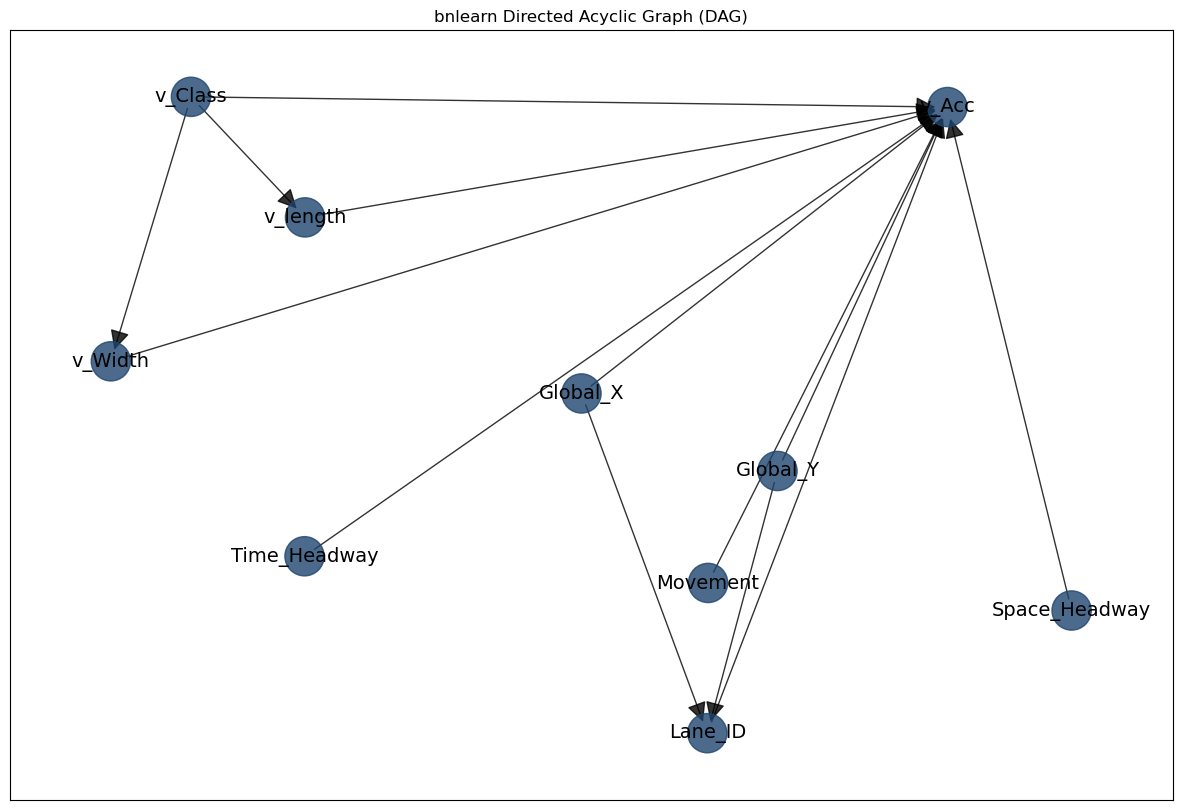

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 10
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [C:\Users\Jayden\AppData\Local\Temp\tmph62vjxzv\d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [C:\Users\Jayden\AppData\Local\Temp\tmph62vjxzv\d3graph.html]
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 10


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [C:\Users\Jayden\AppData\Local\Temp\tmpd50cskq4\bnlearn_Directed_Acyclic_Graph_(DAG).html]
[d3blocks] >INFO> File already exists and will be overwritten: [C:\Users\Jayden\AppData\Local\Temp\tmpd50cskq4\bnlearn_Directed_Acyclic_Graph_(DAG).html]


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


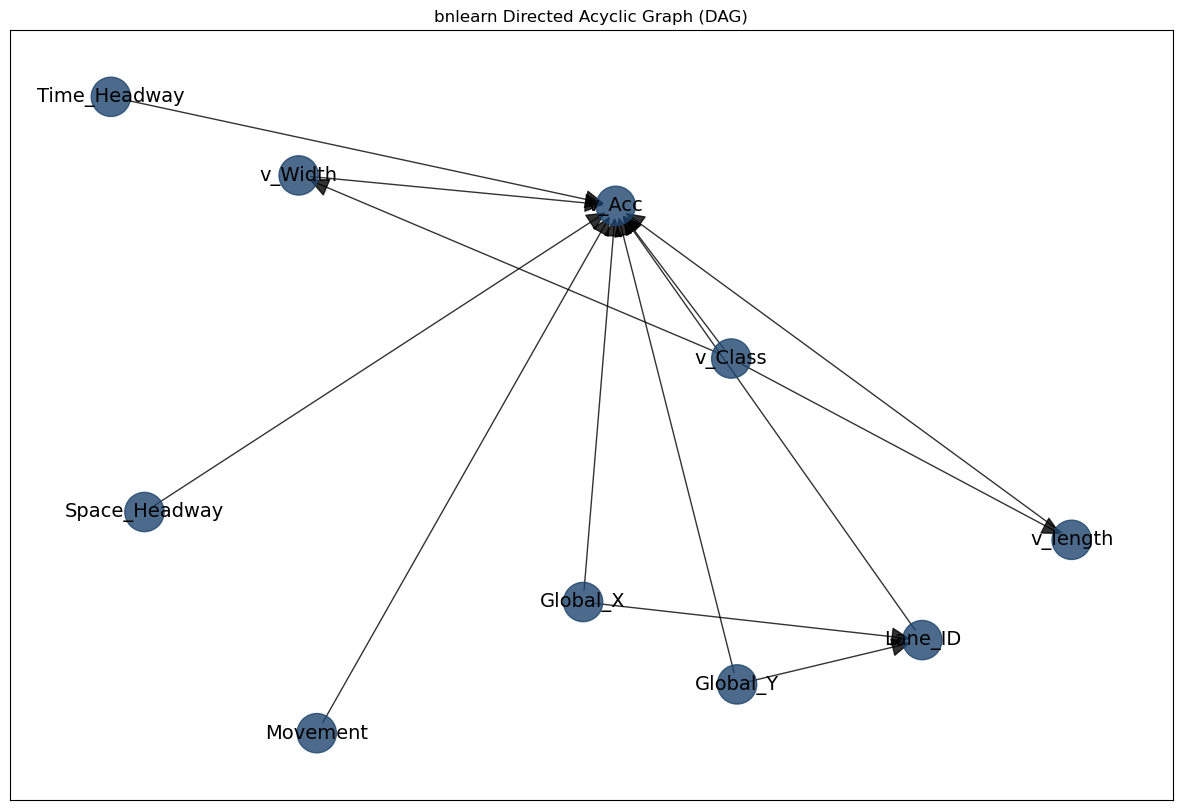

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 10
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [C:\Users\Jayden\AppData\Local\Temp\tmpn74b22rj\d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [C:\Users\Jayden\AppData\Local\Temp\tmpn74b22rj\d3graph.html]
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 10


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [C:\Users\Jayden\AppData\Local\Temp\tmpeke14obu\bnlearn_Directed_Acyclic_Graph_(DAG).html]
[d3blocks] >INFO> File already exists and will be overwritten: [C:\Users\Jayden\AppData\Local\Temp\tmpeke14obu\bnlearn_Directed_Acyclic_Graph_(DAG).html]


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


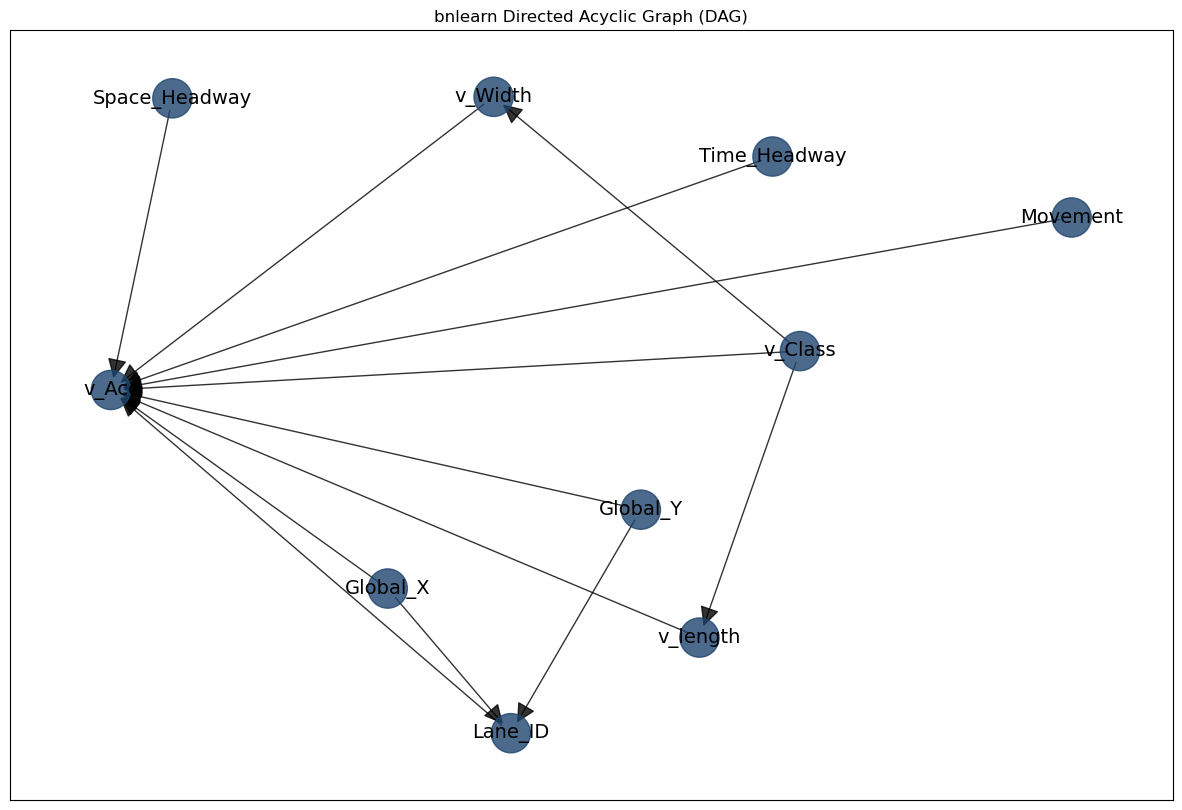

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 10
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [C:\Users\Jayden\AppData\Local\Temp\tmpsgmfy5nc\d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [C:\Users\Jayden\AppData\Local\Temp\tmpsgmfy5nc\d3graph.html]
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 10


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [C:\Users\Jayden\AppData\Local\Temp\tmptil9wdsk\bnlearn_Directed_Acyclic_Graph_(DAG).html]
[d3blocks] >INFO> File already exists and will be overwritten: [C:\Users\Jayden\AppData\Local\Temp\tmptil9wdsk\bnlearn_Directed_Acyclic_Graph_(DAG).html]


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


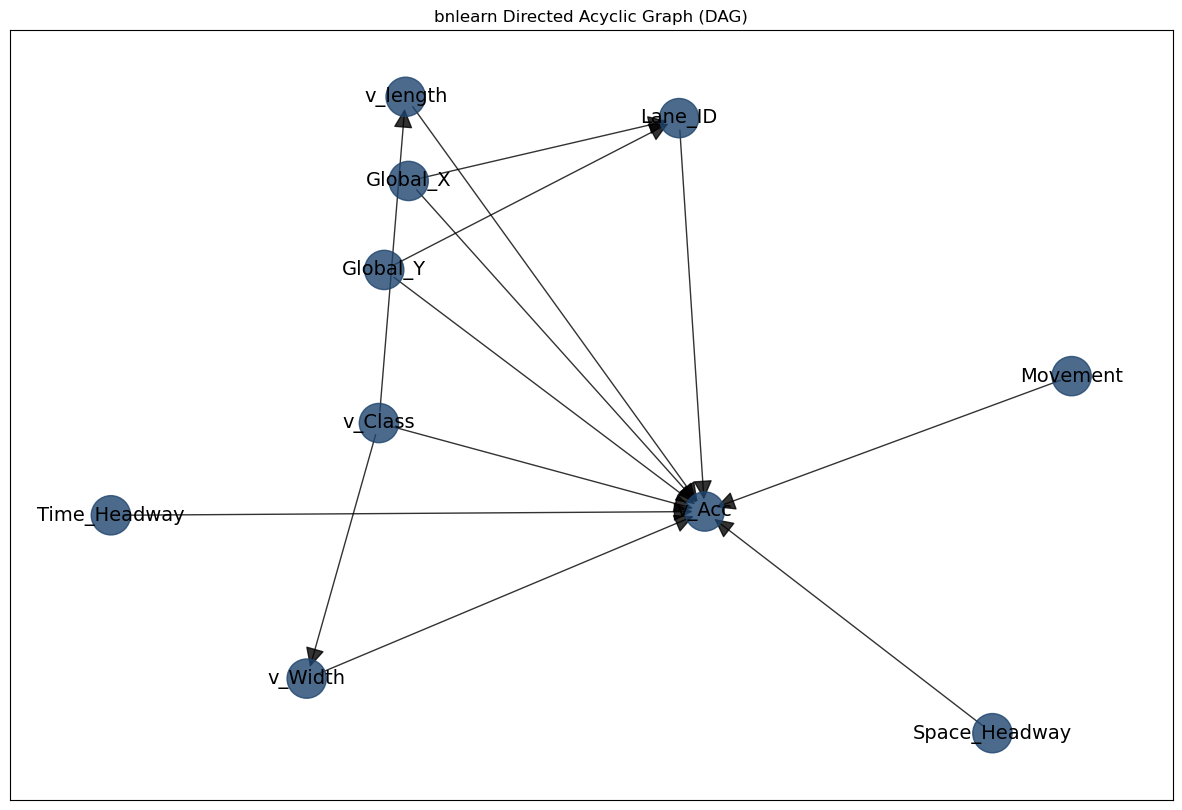

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 10
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [C:\Users\Jayden\AppData\Local\Temp\tmpin0hnsx_\d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [C:\Users\Jayden\AppData\Local\Temp\tmpin0hnsx_\d3graph.html]
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 10


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [C:\Users\Jayden\AppData\Local\Temp\tmpcccuug7k\bnlearn_Directed_Acyclic_Graph_(DAG).html]
[d3blocks] >INFO> File already exists and will be overwritten: [C:\Users\Jayden\AppData\Local\Temp\tmpcccuug7k\bnlearn_Directed_Acyclic_Graph_(DAG).html]


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


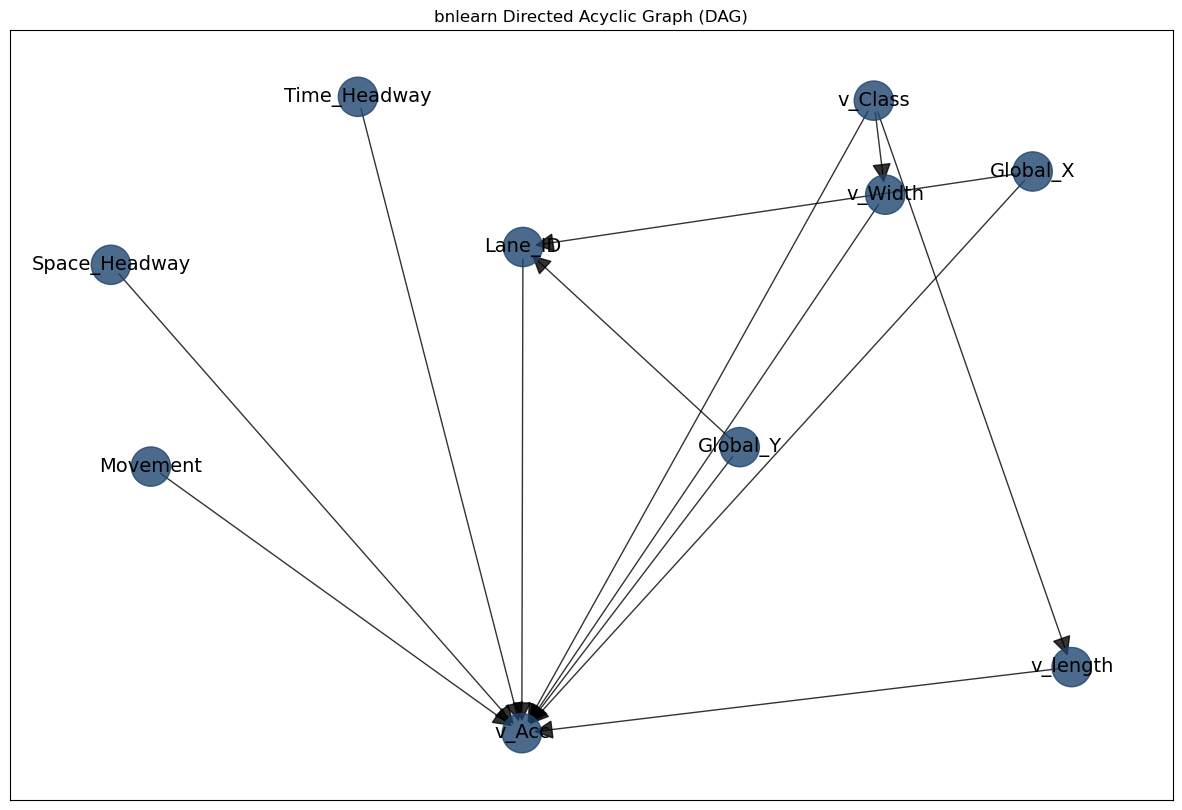

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 10
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [C:\Users\Jayden\AppData\Local\Temp\tmpdxyx62ud\d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [C:\Users\Jayden\AppData\Local\Temp\tmpdxyx62ud\d3graph.html]
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 10


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [C:\Users\Jayden\AppData\Local\Temp\tmpfd7q3z2i\bnlearn_Directed_Acyclic_Graph_(DAG).html]
[d3blocks] >INFO> File already exists and will be overwritten: [C:\Users\Jayden\AppData\Local\Temp\tmpfd7q3z2i\bnlearn_Directed_Acyclic_Graph_(DAG).html]


['0.85654 0.79048 0.85654 0.811 0.51458 0.51458 uniform cbt SVM 0.475 2 sigmoid 3 TAN_1']

In [52]:
main_train(param_grid[23], data)

In [49]:
import time
from tqdm import tqdm
from contextlib import contextmanager
import joblib
from joblib import Parallel, delayed

@contextmanager
def tqdm_joblib(tqdm_object):
    """Context manager to patch joblib to report into tqdm progress bar given as argument"""

    def tqdm_print_progress(self):
        if self.n_completed_tasks > tqdm_object.n:
            n_completed = self.n_completed_tasks - tqdm_object.n
            tqdm_object.update(n=n_completed)

    original_print_progress = joblib.parallel.Parallel.print_progress
    joblib.parallel.Parallel.print_progress = tqdm_print_progress

    try:
        yield tqdm_object
        
    finally:
        joblib.parallel.Parallel.print_progress = original_print_progress
        tqdm_object.close()
        
with tqdm_joblib(tqdm(desc="Parametric learning", total=len(param_grid))) as progress_bar:
    
    st = time.time()
    results = Parallel(n_jobs=5)(delayed(main_train)(param_grid[i], data) for i in range(len(param_grid))) #len(param_grid)
    runtime = round((time.time() - st)/60, 4)
    print('Runtime is: ', runtime, ' minute(s)')
    
    print(results)

Parametric learning: 100%|█████████████████████████████████████████████████████████████| 90/90 [03:40<00:00,  2.45s/it]

Runtime is:  3.6824  minute(s)
[None, None, ['0.93796 0.91826 0.93796 0.92382 0.51286 0.33468 uniform cbt SVM 0.45 1 sigmoid 3 NBN_1'], ['0.93796 0.91826 0.93796 0.92382 0.51286 0.33468 uniform cbt SVM 0.45 2 sigmoid 3 NBN_1'], None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, ['0.93796 0.91826 0.93796 0.92382 0.51286 0.33468 uniform cbt SVM 0.45 1 sigmoid 3 TAN_1'], ['0.93796 0.91826 0.93796 0.92382 0.51286 0.33468 uniform cbt SVM 0.45 2 sigmoid 3 TAN_1'], None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, ['0.93796 0.91826 0.93796 0.92382 0.51286 0.33468 uniform cbt SVM 0.45 1 sigmoid 3 TAN_2'], ['0.93796 0.91826 0.93796 0.92382 0.51286 0.33468 uniform cbt SVM 0.45 2 sigmoid 3 TAN_2'], None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, ['0.93796 0.91826 0.93796 0.92382 0.51286 0.33468 uniform cbt SVM 0.45 1 sigmoid 3 TAN_3'], ['0.93796 0.91826 0.9379

a = main_train(param_grid[0], data)
print(a)

for result in results:
    if result != None:
        print(result[0])

In [20]:
saving_folder = # put the directory of a FOLDER to specify where to store the results
saving_file = saving_folder + '\\' + 'results 8.txt'


##Save the results (str) to a txt file
#with open(saving_file, 'a') as f:
#    for result in results:
#        if result != None:
#            f.write(str(result[0]) + '\n')

            
# Convert the txt file to pandas dataframe for getting the optimal hyperparameters
import pandas as pd

df = pd.read_csv(saving_file, sep=" ", header=None)

df.columns = ['Accuracy', 'Precision', 'Recall', 'F-1', 'AUC', 'Balanced Accuracy', 'Discretization', 'Skew method',
                                                                                                         'Outlier removal method', 
                                                                                                         'c',
                                                                                                         'n', 
                                                                                                         'kernel', 
                                                                                                         'nb', 
                                                                                                         'BN names']

df

,Accuracy,Precision,Recall,F-1,AUC,Balanced Accuracy,Discretization,Skew method,Outlier removal method,c,n,kernel,nb,BN names
0,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,1,sigmoid,3,NBN_1
1,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,2,sigmoid,3,NBN_1
2,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,1,sigmoid,3,TAN_1
3,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,2,sigmoid,3,TAN_1
4,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,1,sigmoid,3,TAN_2
5,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,2,sigmoid,3,TAN_2
6,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,1,sigmoid,3,TAN_3
7,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,2,sigmoid,3,TAN_3
8,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,1,sigmoid,3,TAN_4
9,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,2,sigmoid,3,TAN_4


In [21]:
#!pip install contextlib2

df.describe()

In [22]:
df.nlargest(1, 'Accuracy', keep = 'all')

,Accuracy,Precision,Recall,F-1,AUC,Balanced Accuracy,Discretization,Skew method,Outlier removal method,c,n,kernel,nb,BN names
0,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,1,sigmoid,3,NBN_1
1,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,2,sigmoid,3,NBN_1
2,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,1,sigmoid,3,TAN_1
3,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,2,sigmoid,3,TAN_1
4,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,1,sigmoid,3,TAN_2
5,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,2,sigmoid,3,TAN_2
6,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,1,sigmoid,3,TAN_3
7,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,2,sigmoid,3,TAN_3
8,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,1,sigmoid,3,TAN_4
9,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,2,sigmoid,3,TAN_4


### ----------------------------------------------------------------

In [65]:
df_0 = df[df['BN names'] == 'TAN_3']
df_1 = df_0[df_0['n'] == 2]
df_2 = df_1[df_1['Discretization'] == 'uniform']
#df_2 = df_2[df_2['nb'] == 4]

df_3 = df_2.nlargest(1, 'Accuracy', keep = 'all').reset_index(drop = True)
df_3

,Accuracy,Precision,Recall,F-1,AUC,Balanced Accuracy,Discretization,Skew method,Outlier removal method,c,n,kernel,nb,BN names
0,0.93796,0.91826,0.93796,0.92382,0.51286,0.33468,uniform,cbt,SVM,0.45,2,sigmoid,3,TAN_3


df_3['Skew method'].loc[0]

### Fine-tune the random state for data splitting to get the optimal testing accuracy

In [68]:
import os
from sklearn.model_selection import ParameterGrid
import time
from joblib import Parallel, delayed
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from tqdm import tqdm
from contextlib import contextmanager
import joblib
from joblib import Parallel, delayed

@contextmanager
def tqdm_joblib(tqdm_object):
    """Context manager to patch joblib to report into tqdm progress bar given as argument"""

    def tqdm_print_progress(self):
        if self.n_completed_tasks > tqdm_object.n:
            n_completed = self.n_completed_tasks - tqdm_object.n
            tqdm_object.update(n=n_completed)

    original_print_progress = joblib.parallel.Parallel.print_progress
    joblib.parallel.Parallel.print_progress = tqdm_print_progress
 
    try:
        yield tqdm_object
        
    finally:
        joblib.parallel.Parallel.print_progress = original_print_progress
        tqdm_object.close()

def test_acc_find(df_3, rs, data, BN):
    discret = df_3['Discretization'].loc[0]
    skew = df_3['Skew method'].loc[0]
    outlier_removal = df_3['Outlier removal method'].loc[0]
    c = df_3['c'].loc[0]
    n = df_3['n'].loc[0]
    kernel = df_3['kernel'].loc[0]
    nb = df_3['nb'].loc[0]
    BN_structure = BN
    print(BN_structure)

    per_metrics = {0:'Accuracy', 1:'Precision', 2:'Recall', 3:'F-1', 4:'AUC', 5:'Balanced Accuracy'}

    try:
        # all selected features from raw dataset based on the BN structure
        all_fea = nodes2feas(BN_structure)
        # all explanatory features from selected features
        exp_fea = all_fea.copy()
        exp_fea.remove('v_Acc')
        # the response feature(s) from selected features
        variables = ['v_Acc']

        ########################### Train and validate BN models ################
        if discret == 'uniform': 
            discret_data, min_max_scaler = data_preproc_uniform(data, skew, outlier_removal, 
                                                                 c, n, kernel, nb)
        elif discret == 'scale_1': 
            discret_data, min_max_scaler = data_preproc_scale_1(data, skew, outlier_removal, 
                                                                 c, n, kernel, nb)
        elif discret == 'scale_2': 
            discret_data, min_max_scaler = data_preproc_scale_2(data, skew, outlier_removal, 
                                                                 c, n, kernel, nb)

        data_tr, data_te = train_test_split(discret_data, test_size = 0.2, random_state = rs, shuffle = True)

        # use all training dataset to train the optimal BN model
        bn_model = param_learning(BN_structure, data_tr)

        # use the testing dataset to test the optimal BN model
        exp_fea = all_fea.copy()
        exp_fea.remove('v_Acc')

        X_te = data_te[exp_fea]
        y_te = data_te['v_Acc']

        X_tr = data_tr[exp_fea]
        y_tr = data_tr['v_Acc']

        y_pred = bn_infer(X_te, bn_model, variables)
        #y_pred = bn_infer(X_tr, bn_model, variables)

        performance_metrics, cm = cal_cat_metrics(y_te, y_pred)
        #performance_metrics, cm = cal_cat_metrics(y_tr, y_pred)

        performance_metrics = pd.DataFrame(performance_metrics).T.rename(columns = per_metrics)

        acc = performance_metrics['Accuracy'].loc[0]
        if acc >= 0.85:
            alpha = 0.4
            target_names = ['Non-existent', 'Slight', 'Moderate', 'Strong'] # ['(-1, 1]', '(1, 3]', '(3, 5]', '> 5']
            cm_fig = cm_visual(cm, target_names, alpha)
            plt.title('Random state: ' + list(rs))
            plt.show()

        return [rs, acc]

    except ValueError:
        pass

    except KeyError:
        pass

    
# Identify the random state that enables the testing accuracy to be greater than 0.8
rss = range(10000)
BN = TAN_3
print(BN)

with tqdm_joblib(tqdm(desc="Finding optimal testing acc", total=len(rss))) as progress_bar:
    
    Accs = Parallel(n_jobs=5)(delayed(test_acc_find)(df_3, rss[i], sel_data, BN) for i in range(500)) #len(param_grid)

[('Global_X', 'v_Acc'), ('Global_X', 'Lane_ID'), ('Global_Y', 'v_Acc'), ('Global_Y', 'Lane_ID'), ('Lane_ID', 'v_Acc'), ('v_length', 'v_Acc'), ('v_Width', 'v_Acc'), ('v_Class', 'v_Acc'), ('v_Class', 'v_length'), ('v_Class', 'v_Width'), ('Movement', 'v_Acc'), ('Space_Headway', 'v_Acc'), ('Time_Headway', 'v_Acc'), ('Time_Headway', 'Space_Headway')]


Finding optimal testing acc:   5%|██▏                                        | 500/10000 [14:53<4:43:00,  1.79s/it]


print(Accs)

In [69]:
print(Accs)

[None, [1, 0.8493], [2, 0.8493], None, None, None, [6, 0.8457], None, None, None, None, [11, 0.8466], None, None, [14, 0.8493], None, None, None, [18, 0.8493], None, None, None, None, [23, 0.8493], None, [25, 0.8475], None, None, [28, 0.8457], None, None, [31, 0.843], None, None, None, [35, 0.8403], [36, 0.8421], None, None, None, [40, 0.8484], [41, 0.8267], None, [43, 0.8421], [44, 0.8421], None, None, [47, 0.8484], None, [49, 0.8448], None, [51, 0.8294], None, None, None, [55, 0.8493], [56, 0.8466], None, [58, 0.8448], None, [60, 0.8484], None, None, [63, 0.8475], [64, 0.843], [65, 0.8466], None, None, None, None, [70, 0.8357], None, None, None, [74, 0.8466], None, [76, 0.8448], None, None, None, None, None, None, [83, 0.8303], None, [85, 0.8412], [86, 0.8321], None, [88, 0.8484], None, [90, 0.8457], [91, 0.843], None, None, [94, 0.8493], [95, 0.8475], None, None, None, None, [100, 0.8394], [101, 0.8357], None, None, None, None, [106, 0.8357], None, [108, 0.8466], None, [110, 0.8466]

In [70]:
test_accs = []
test_rs = []
thred = 0

for item in Accs:
    if item != None: 
        #print(item[1])
        if item[1] >= thred:
            test_accs.append(item[1])
            test_rs.append(item[0])

if len(test_accs) == 0:
    print('No optimal testing accuracy is greater than ' + str(thred))

else:
    print(test_accs)
    print(test_rs)

[0.8493, 0.8493, 0.8457, 0.8466, 0.8493, 0.8493, 0.8493, 0.8475, 0.8457, 0.843, 0.8403, 0.8421, 0.8484, 0.8267, 0.8421, 0.8421, 0.8484, 0.8448, 0.8294, 0.8493, 0.8466, 0.8448, 0.8484, 0.8475, 0.843, 0.8466, 0.8357, 0.8466, 0.8448, 0.8303, 0.8412, 0.8321, 0.8484, 0.8457, 0.843, 0.8493, 0.8475, 0.8394, 0.8357, 0.8357, 0.8466, 0.8466, 0.8448, 0.8493, 0.8493, 0.8466, 0.8403, 0.8448, 0.8484, 0.843, 0.8484, 0.8339, 0.8375, 0.8285, 0.8493, 0.843, 0.8285, 0.8439, 0.8321, 0.8484, 0.8412, 0.8484, 0.8375, 0.8421, 0.8493, 0.8475, 0.8448, 0.8366, 0.8457, 0.8493, 0.8475, 0.8375, 0.8457, 0.8457, 0.8484, 0.8375, 0.8412, 0.8421, 0.8394, 0.8448, 0.8484, 0.8339, 0.8439, 0.8412, 0.8421, 0.8339, 0.8466, 0.8457, 0.8475, 0.8448, 0.8448, 0.8403, 0.8366, 0.8493, 0.8348, 0.8421, 0.8493, 0.8484, 0.8366, 0.8475, 0.843, 0.8466, 0.8448, 0.8466, 0.8394, 0.8493, 0.8412, 0.8475, 0.8348, 0.8403, 0.8484, 0.8421, 0.8457, 0.8375, 0.8339, 0.8466, 0.8294, 0.8484, 0.8421, 0.8493, 0.833, 0.8222, 0.8394, 0.8493, 0.8439, 0.8403

data_f = pd.DataFrame()
data_f['Accuracy'] = test_accs
data_f['RS'] = test_rs

data_f.to_csv('TAN_22 (acc vs. RS).csv')

In [71]:
data_f = pd.DataFrame() 
data_f['Accuracy'] = test_accs 
data_f['RS'] = test_rs

data_f.to_csv('trial 1 (acc vs. RS).csv')

In [72]:
data_f_path = r"trial 1 (acc vs. RS).csv"

data_f = pd.read_csv(data_f_path, index_col = [0])

data_f

,Accuracy,RS
0,0.8493,1
1,0.8493,2
2,0.8457,6
3,0.8466,11
4,0.8493,14
...,...,...
161,0.8493,476
162,0.8375,479
163,0.8366,491
164,0.8439,494


In [73]:
########################## Stop here #####################

In [74]:
import os
from sklearn.model_selection import ParameterGrid
import time
from joblib import Parallel, delayed
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN
from imblearn.under_sampling import RandomUnderSampler


discret = 'scale_2'
skew = 'sigmoid'
outlier_removal = 'MCD'
c = 0.5
n = 1
kernel = 'linear'
nb = 5
BN_structure = NBN_1
print(BN_structure)

per_metrics = {0:'Accuracy', 1:'Precision', 2:'Recall', 3:'F-1',
               4:'AUC', 5:'Balanced Accuracy'}

for rs in test_rs:
    
    try:
        # all selected features from raw dataset based on the BN structure
        all_fea = nodes2feas(BN_structure)
        # all explanatory features from selected features
        exp_fea = all_fea.copy()
        exp_fea.remove('v_Acc')
        # the response feature(s) from selected features
        variables = ['v_Acc']

        ########################### Train and validate BN models ################
        if discret == 'uniform':
            discret_data, min_max_scaler = data_preproc_uniform(sel_data, skew, outlier_removal, 
                                                                       c, n, kernel, nb)
        elif discret == 'scale_1':
            discret_data, min_max_scaler = data_preproc_scale_1(sel_data, skew, outlier_removal, 
                                                                      c, n, kernel, nb)
        elif discret == 'scale_2':
            discret_data, min_max_scaler = data_preproc_scale_2(sel_data[all_fea],
                                                                skew, outlier_removal, 
                                                                 c, n, kernel, nb)
        #print(discret_data)
        data_tr, data_te = train_test_split(discret_data, test_size = 0.2, random_state = rs, shuffle = True)

        # use all training dataset to train the optimal BN model
        bn_model = param_learning(BN_structure, data_tr)

        # use the testing dataset to test the optimal BN model
        exp_fea = all_fea.copy()
        exp_fea.remove('v_Acc')

        X_te = data_te[exp_fea]
        y_te = data_te['v_Acc']
        #print(y_te)

        X_tr = data_tr[exp_fea]
        y_tr = data_tr['v_Acc']

        y_pred = bn_infer(X_te, bn_model, variables)
        #y_pred = bn_infer(X_tr, bn_model, variables)

        performance_metrics, cm = cal_cat_metrics(y_te, y_pred)
        #performance_metrics, cm = cal_cat_metrics(y_tr, y_pred)
        print(performance_metrics)

        performance_metrics = pd.DataFrame(performance_metrics).T.rename(columns = per_metrics)

        alpha = 0.4
        target_names = ['Non-existent', 'Slight', 'Moderate', 'Strong'] # ['(-1, 1]', '(1, 3]', '(3, 5]', '> 5']
        cm_fig = cm_visual(cm, target_names, alpha)
        plt.title('Random state: ' + str(rs))
        plt.show()
    
    except ValueError:
        pass

    except KeyError:
        pass

[('Global_X', 'v_Acc'), ('Global_Y', 'v_Acc'), ('Lane_ID', 'v_Acc'), ('v_length', 'v_Acc'), ('v_Width', 'v_Acc'), ('v_Class', 'v_Acc'), ('Movement', 'v_Acc'), ('Space_Headway', 'v_Acc'), ('Time_Headway', 'v_Acc')]
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3  

0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
     

0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
     

0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
10069    1.0
10070    1.0
10071    1.0
10072    1.0
10073    1.0
Name: v_Acc, Length: 10074, dtype: float64
0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
     

### Obtain the training accuracy of the optimal model (i.e., TAN_22)

[('Global_X', 'v_Acc'), ('Global_Y', 'v_Acc'), ('Lane_ID', 'v_Acc'), ('v_length', 'v_Acc'), ('v_Width', 'v_Acc'), ('v_Class', 'v_Acc'), ('Movement', 'v_Acc'), ('Space_Headway', 'v_Acc'), ('Time_Headway', 'v_Acc')]
['v_Acc', 'Global_X', 'Global_Y', 'Lane_ID', 'v_length', 'v_Width', 'v_Class', 'Movement', 'Space_Headway', 'Time_Headway']
[0.8664, 0.7914, 0.8664, 0.8207, 0.5025, 0.5025]


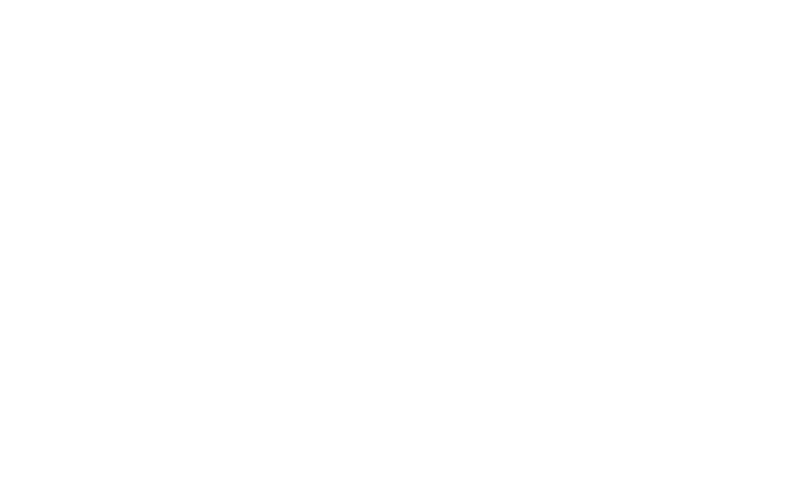

In [75]:
def test_acc_CM(df, rs, data, BN):
    
    discret = df['Discretization'].loc[0]
    skew = df['Skew method'].loc[0]
    outlier_removal = df['Outlier removal method'].loc[0]
    c = df['c'].loc[0]
    n = df['n'].loc[0]
    kernel = df['kernel'].loc[0]
    nb = df['nb'].loc[0]
    BN_structure = BN
    print(BN_structure)

    per_metrics = {0:'Accuracy', 1:'Precision', 2:'Recall', 3:'F-1',
                   4:'AUC', 5:'Balanced Accuracy'}

    try:
        # all selected features from raw dataset based on the BN structure
        all_fea = nodes2feas(BN_structure)
        # all explanatory features from selected features
        exp_fea = all_fea.copy()
        exp_fea.remove('v_Acc')
        # the response feature(s) from selected features
        variables = ['v_Acc']

        ########################### Train and validate BN models ################
        if discret == 'uniform': 
            discret_data, min_max_scaler = data_preproc_uniform(data, skew, outlier_removal, 
                                                                 c, n, kernel, nb)
        elif discret == 'scale_1': 
            discret_data, min_max_scaler = data_preproc_scale_1(data, skew, outlier_removal, 
                                                                 c, n, kernel, nb)
        elif discret == 'scale_2': 
            discret_data, min_max_scaler = data_preproc_scale_2(data, skew, outlier_removal, 
                                                                 c, n, kernel, nb)

        data_tr, data_te = train_test_split(discret_data, test_size = 0.2, random_state = rs, shuffle = True)

        # use all training dataset to train the optimal BN model
        bn_model = param_learning(BN_structure, data_tr)
        
        
        ################# Compute and output the likelihood of each node for the optimal model ####################
    
        from pgmpy.models import BayesianNetwork
        from pgmpy.estimators import MaximumLikelihoodEstimator
        
        
        bayesNet = BayesianNetwork()
        bayesNet.add_node("v_Acc")
        bayesNet.add_node("Global_X")
        bayesNet.add_node("Global_Y")
        bayesNet.add_node("Lane_ID")
        bayesNet.add_node("v_length")
        bayesNet.add_node("v_Width")
        bayesNet.add_node("v_Class")
        bayesNet.add_node("Movement")
        bayesNet.add_node("Space_Headway")
        bayesNet.add_node("Time_Headway")
        
        # The directed edge needs to be encoded inversely
        bayesNet.add_edge("v_Acc", "Global_X")
        bayesNet.add_edge("v_Acc", "Global_Y")
        bayesNet.add_edge("v_Acc", "Lane_ID")
        bayesNet.add_edge("v_Acc", "v_length")
        bayesNet.add_edge("v_Acc", "v_Width")
        bayesNet.add_edge("v_Acc", "v_Class")
        bayesNet.add_edge("v_Acc", "Movement")
        bayesNet.add_edge("v_Acc", "Space_Headway")
        bayesNet.add_edge("v_Acc", "Time_Headway")

        

        bayesNet.fit(data=data_tr, estimator=MaximumLikelihoodEstimator)

        from pgmpy.readwrite import BIFReader, BIFWriter
        model = BIFWriter(bayesNet)
        print(model.get_variables())

        # write the learned model to .bif file
        # reference: https://pgmpy.org/readwrite/bif.html
        model.write_bif(filename='NBN.bif')
        
         # Compute the conditional probability using maximum likelihood estiamtion   
        mle = MaximumLikelihoodEstimator(model=bayesNet, data=data_tr)

        print(mle)

         CPT_save_path = r""
            for fea in all_fea:

                cpd = mle.estimate_cpd(node = fea)
                print(cpd)

                df_cpd = pd.DataFrame(cpd.values.tolist())
                df_cpd.to_csv(CPT_save_path + '\\' + str(fea) + '_NBN5' + '.csv')
    ###################################################################################
        
        
        # use the testing dataset to test the optimal BN model
        exp_fea = all_fea.copy()
        exp_fea.remove('v_Acc')

        X_te = data_te[exp_fea]
        y_te = data_te['v_Acc']

        X_tr = data_tr[exp_fea]
        y_tr = data_tr['v_Acc']

        y_pred = bn_infer(X_te, bn_model, variables)
        #y_pred = bn_infer(X_tr, bn_model, variables)

        performance_metrics, cm = cal_cat_metrics(y_te, y_pred)
        #print(cm)
        #performance_metrics, cm = cal_cat_metrics(y_tr, y_pred)
        print(performance_metrics)

        performance_metrics = pd.DataFrame(performance_metrics).T.rename(columns = per_metrics)
        
        alpha = 0.4
        target_names = ['Non-existent', 'Slight', 'Moderate', 'Strong'] # ['(-1, 1]', '(1, 3]', '(3, 5]', '> 5']
        cm_fig = cm_visual(cm, target_names, alpha)
        plt.title('Random state: ' + str(rs))
        plt.show()
        
        #return [rs, performance_metrics['Accuracy'].loc[0]]

    except ValueError:
        pass

    except KeyError:
        pass

    
#rs = 913
test_acc_CM(df_3, 45, sel_data, NBN_1)

# Find the random state that enables the acc to be greater than 0.85

rss1 = []
acc1 = []
for item in temp:
    if item[1] >= 0.85:
        rss1.append(item[0])
        acc1.append(item[1])
print(rss1)
print(acc1)

### Get the intervals for each variable

In [91]:



#mask = (data['v_Acc'] <= 50) # Drop the sample with UHI>6.5 due to too less samples causing extreme data imbalance issue

#data_1 = (data.loc[mask]).reset_index(drop=True)

#data_1['v_Acc'] = scale_1(data_1['v_Acc'])

#data = data_1.copy()

'''
Subtask 1: data scaling using min-max scaler
'''
# get the input values only for data normalization. Note: the output is categorical and no need to normalize it
inputs = data.drop(['v_Acc'], axis = 1) 
min_max_scaler = MinMaxScaler()
data_temp = min_max_scaler.fit_transform(inputs)
nor_data = pd.DataFrame(data_temp, columns = inputs.columns)

# integrate the normalized inputs and categorical output
nor_data['v_Acc'] = data['v_Acc']

'''
Subtask 2: Outlier removal
'''



if outlier_removal == 'MCD':
    if c > 0.5: # c has a bound of (0, 0.5] for MCD algorithm  
        c = 0.5
        mcd = EllipticEnvelope(contamination = c, random_state = 0)
        y_hat = mcd.fit_predict(data)
        mask = y_hat != -1
        ro_data = data.loc[mask, :]
    else:
        mcd = EllipticEnvelope(contamination = c, random_state = 0)
        y_hat = mcd.fit_predict(data)
        mask = y_hat != -1
        ro_data = data.loc[mask, :]

elif outlier_removal == 'LOF': 
    if c > 0.5: # c has a bound of (0, 0.5] for MCD algorithm
        c = 0.5
        lof = LocalOutlierFactor(n_neighbors = n, contamination = c)
        y_hat = lof.fit_predict(data)
        mask = y_hat != -1
        ro_data = data.loc[mask, :]

    else:
        lof = LocalOutlierFactor(n_neighbors = n, contamination = c)
        y_hat = lof.fit_predict(data)
        mask = y_hat != -1
        ro_data = data.loc[mask, :]

elif outlier_removal == 'SVM':
    svm = OneClassSVM(kernel = kernel, nu = c)
    y_hat = svm.fit_predict(data)
    mask = y_hat != -1
    ro_data = data.loc[mask, :]

ro_data = ro_data.reset_index(drop=True) # !!! reset the index of dataframe



def skew_transform(method, data):
    
        # step 1: define functions for the 5 skew transform methods
        def sigmoid(x):
            y = 1/(1 + np.exp(-x))
            return y

        def log_function(x):
            y = np.log10(x)
            return y

        def cube_root(x):
            y = np.cbrt(x)
            return y

        def hyper_tan(x):
            y = np.tanh(x)
            return y

        def box_cox(x):
            y, _ = boxcox(x)
            return y

        # step 2: select one of the skew method
        if method == 'sigmoid':
            y = sigmoid(data)

        elif method == 'log':
            y = log_function(data+1)

        elif method == 'cbt':
            y = cube_root(data)

        elif method == 'ht':
            y = hyper_tan(data)

        else:
            y = box_cox(data)

        return np.array(y)





In [96]:
#-----------------------------#
headers = list(ro_data.columns)
headers.remove('v_Acc')

trans_data_X = []
for header in headers:
    if header != 'v_Acc':
        y = ro_data[header]
        trans_data_X.append(y)

# Trans_data have the input data only
trans_data = pd.DataFrame(np.transpose(trans_data_X), columns = headers) 

In [97]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins= 4, encode='ordinal', strategy='uniform', random_state = 0)

x = discretizer.fit_transform(min_max_scaler.inverse_transform(np.power(trans_data, 3)))

print(ro_data.columns)
bin_edges = discretizer.bin_edges_ 
bin_edges

Index(['Global_X', 'Global_Y', 'Lane_ID', 'v_length', 'v_Width', 'v_Class',
       'v_Acc', 'Movement', 'Space_Headway', 'Time_Headway'],
      dtype='object')


array([array([1.70072946e+23, 1.70085361e+23, 1.70097777e+23, 1.70110192e+23,
              1.70122607e+23])                                               ,
       array([9.98511201e+21, 9.99093545e+21, 9.99675889e+21, 1.00025823e+22,
              1.00084058e+22])                                               ,
       array([     0.,  43632.,  87264., 130896., 174528.]),
       array([ 70596.3642, 184096.5293, 297596.6944, 411096.8595, 524597.0246]),
       array([1126.5   , 1416.3688, 1706.2376, 1996.1064, 2285.9752]),
       array([-inf,  inf]), array([ 3. ,  6.5, 10. , 13.5, 17. ]),
       array([0.00000000e+00, 7.49681071e+08, 1.49936214e+09, 2.24904321e+09,
              2.99872429e+09])                                               ,
       array([0.00000e+00, 2.49999e+15, 4.99998e+15, 7.49997e+15, 9.99996e+15])],
      dtype=object)